# Exercise 03: Decision trees (and introduction to scikit-learn)

Welcome to the third exercise for Applied Machine Learning.

Your objectives for this session are to:

- get acquainted with scikit-learn (the main machine learning library we'll use in this course), and
- implement a decision tree classifier in a typical scikit-learn workflow and interpret its output.

____

## Part 1: Introduction to scikit-learn (or `sklearn`)

As a best practice, let's first import all the libraries we'll use for this lab, including scikit-learn (also known as `sklearn`).

Since `sklearn` is a large library, we only import specific functions or modules that we need. We do this using the following syntax: `from <library> import <module>` or `from <library>.<module> import <function>`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree # importing the tree module from sklearn
from sklearn import metrics # importing the metrics module from sklearn
from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn's model_selection module

At a basic level, using `sklearn` involves training (or "fitting") pre-programmed algorithms (or "estimators") to some data, in order to produce some kind of model.

For supervised machine learning, the data should be structured as two arrays (or [array-like](https://scikit-learn.org/stable/glossary.html#term-array-like) objects):
* `X` = 2D array of samples/instances/observations (sometimes called the "samples matrix," "design matrix," or "feature matrix"), where instances are represented as rows and features/attributes are represented as columns.

* `y` = 1D array where the ith entry corresponds to the target of the ith sample (row) of X. For regression tasks the target values are real numbers. For classification tasks the target values are integers (or any other discrete set of values). 

With `X` and `y`, you can simply use scikit-learn's `fit` function to fit the estimator to your data — i.e., "train your model on your data." 

Let's look at the basic `sklearn` workflow and a couple of the most important functions:  

**Step 1: Define X and y**

For the sake of demonstration, we'll just create some fake data.

In [2]:
# define X — let's say we have 4 instances with 3 features (i.e., 4 rows x 3 columns)
X = [[ 1,  2,  3],  
     [11, 12, 13],
     [21, 22, 23],
     [31, 32, 33]]

# define y — let's say we have a binary target variale where the first two instances are class 0 and the second two samples are class 1
y = [0, 0, 1, 1]  

**Step 2: Define your learning algorithm**

There are many learning algorithms one could choose. For the sake of demonstration, we'll use a `DecisionTreeClassifier`.

In [3]:
# define our learning algorithm — we'll use the DecisionTreeClassifier from the tree module and call it example_clf
example_clf = tree.DecisionTreeClassifier() 

**Step 3: Apply the algorithm to the data to produce a model**

Use the `fit()` function from `sklearn` to get the algorithm to "learn" from the data.

In [4]:
# fit our algorithm, a DecisionTreeClassifier, to the data
example_clf.fit(X, y)

DecisionTreeClassifier()

Now we have a trained decision tree classifier called `example_clf`. In other words, `example_clf` is our *model*. 

Then, by using the `predict` function, we can use our model to predict target values (`y`) for new data, as long as the new data has the same features.

In [5]:
# predict classes of the training data X -- this will be equal to y
example_clf.predict(X)  

array([0, 0, 1, 1])

In the code above, notice how `example_clf` is able to predict the target `y` values from the feature matrix `X`. 

**Step 4: Apply your model to new, unseen data**

For the sake of demonstration, let's create some new, fake data. One instance represented as `[9, 8, 7]` and one instance represented as `[39, 38, 37]`. By using the same code as above, `example_clf.predict()`, we use our model to predict class labels for these two new instances based on the training data, `X`.

In [6]:
# predict classes of new data
example_clf.predict([[9, 8, 7], [39, 38, 37]])  # try changing the values and see what happens to the predictions! 

array([0, 1])

Let's reflect on what just happened:
* At Step 1, we took some data and defined `X`, the array with our attributes, and `y`, the array with the target values.
* At Step 2, we chose a learning algorithm. In this case, a `DecisionTreeClassifier`.
* At Step 3, we applied the learning algorithm to our data with the `fit()` function, which produced a *model*.
* At Step 4, we used the model to make predictions for new unseen data.

... That's it! That's the essence of building machine learning models with `sklearn`.

Of course, thing will get more complicated when we use messy real-world data that needs preprocessing, when we want to evaluate and tune our models on validation and test sets, and so on... but we'll get there.

----
### Part 2: Introduction to the dataset and some basic preprocessing

For today's lab, you'll work with a dataset from the medical domain. 

Imagine you're managing a hospital and you want efficiently allocate your resources to treat patients who are at risk of having a stroke ([click here](https://www.nhlbi.nih.gov/health/stroke/causes) to familiarize yourself with what a stroke is, and what existing evidence suggests are key risk factors). Specifically, you want to screen patients and detect which of them are most likely to have a stroke, so that you can allocate resources to them in the early stages, rather than to patients who are unlikely to actually have a stroke. This could both protect patients' health and reduce treatment costs. 

You've been given a dataset with details on different patients that were in the hospital in the past, which includes a column indicating if a patient had a stroke or not. Before considering any modelling, let's first explore the data...

# <font color='red'>TASK 1</font>


Read the `brain_stroke.csv` dataset, using read_csv. How many rows and columns are there?

In [7]:
# your code here
brain_stroke_csv = pd.read_csv('brain_stroke.csv')
rows, columns = brain_stroke_csv.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 500, Columns: 11


Usually, if you're working with a pre-existing dataset, you'll need to do some due diligence to figure out what each attribute represents how they've been encoded. But in this case however, some work has already been done for you, and you're provided with a list of attribute information:

Attribute Information
- 1) `gender`: "Male", "Female" or "Other"
- 2) `age`: age of the patient
- 3) `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 4) `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
- 5) `ever_married`: "No" or "Yes"
- 6) `worktype`: "children", "Govt_job", "Neverworked", "Private" or "Self-employed" 
- 7) `Residence_type`: "Rural" or "Urban"
- 8) `avg_glucose_level`: average glucose level in blood
- 9) `bmi`: body mass index
- 10) `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 11) `stroke`: 1 if the patient had a stroke or 0 if not (the target variable!)

*Note: "Unknown" in `smoking_status` means that the information is unavailable for this patient

We can see how we have a big number of observations and a quite a few number of attributes. For the sake of demonstration, let's just use the `gender`, `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, and `smoking_status` attributes.

# <font color='red'>TASK 2</font>


Create a feature matrix `X` with the  `gender`, `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, and `smoking_status` attributes. And then create and a target array `y` with the `stroke` variable.

In [12]:
# your code here
X = brain_stroke_csv[['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = brain_stroke_csv['stroke']

# <font color='red'>TASK 3</font>

Since we have some categorical variables in our dataset (`gender` and `smoking_status`), we need to encode them with numerical values. The most common way to so is by creating *dummy variables* with *one-hot encoding*. One-hot encoding is a method of representing categorical data as binary vectors, where each unique category is converted into a column with a 1 at the index corresponding to that category and 0s elsewhere (see the image below).

![One-hot encoding](one-hot.png)



Use `pd.get_dummies()` to apply one-hot encoding on the feature matrix `X`. How many rows and columns are there in `X` after applying get_dummies? Do you understand why the shape of `X` has changed after using `pd.get_dummies`? 

In [13]:
# your code here
X = pd.get_dummies(X, columns=['gender', 'smoking_status'])
print(X.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
0  67.0             0              1             228.69  36.6          False   
1  80.0             0              1             105.92  32.5          False   
2  49.0             0              0             171.23  34.4           True   
3  79.0             1              0             174.12  24.0           True   
4  81.0             0              0             186.21  29.0          False   

   gender_Male  smoking_status_Unknown  smoking_status_formerly smoked  \
0         True                   False                            True   
1         True                   False                           False   
2        False                   False                           False   
3        False                   False                           False   
4         True                   False                            True   

   smoking_status_never smoked  smoking_status_smokes  
0                 

----
## Part 3: Building a decision tree classifier

Now let's build a decision tree and apply it to the dataset you just preprocessed. To do this with `sklearn`, we simply create a new object called `dtree` (you can technically call it whatever you want) by using the `DecisionTreeClassifier()` function, which creates a decision tree. 

To train the model, use the `fit()` function. 

Then we print accuracy.

In [ ]:
dtree = tree.DecisionTreeClassifier() 
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))

Accuracy on training set: 1.000


Next, you can visualize the tree using the `plot_tree()` function from the `sklearn` library. 

Note: this will make a big tree, so we save it as a png file. To inspect the tree visualization more closely, you can open the separate `big_tree.png` that has been saved in your working directory and zoom in on specific paths.

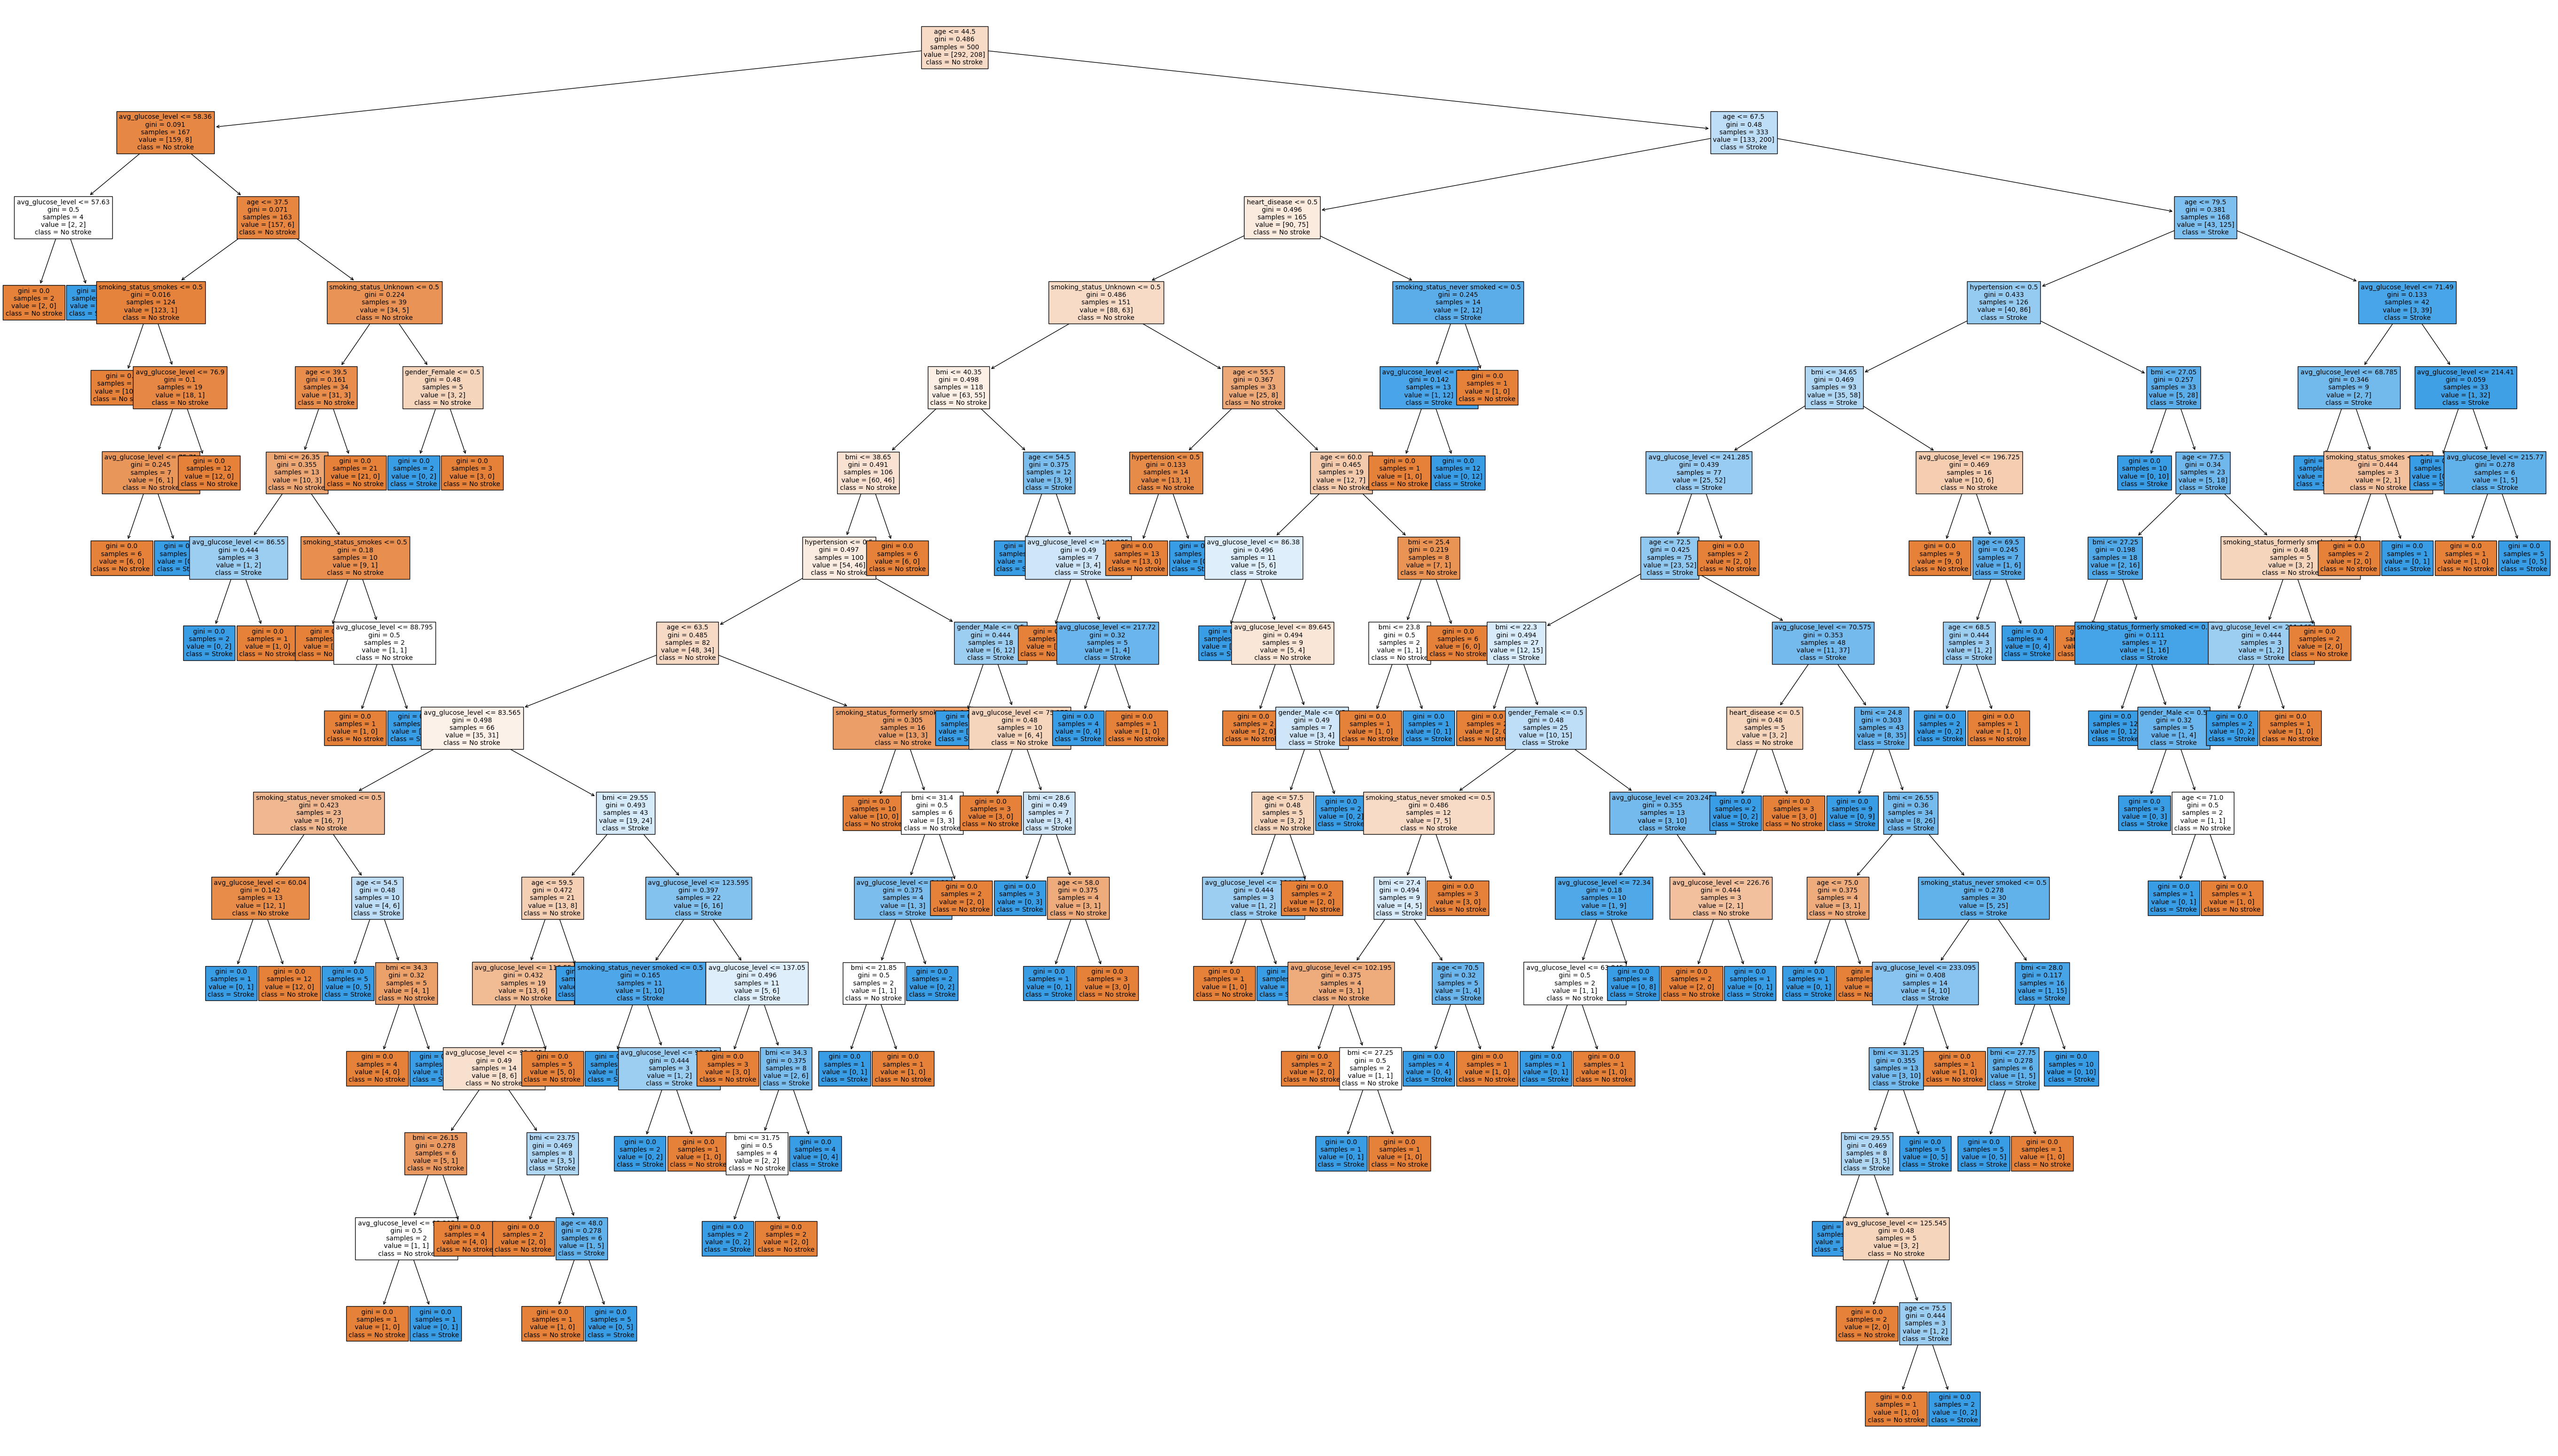

In [15]:
plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=["No stroke", "Stroke"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('big_tree.png', bbox_inches='tight') # save plot as png file 

In the example shown above, we have this giant tree and the training accuracy obtained is 1.00. What is this showing? What does it mean? 

(Hint: What's shown in the leaf nodes of the huge tree above?)

# <font color='red'>TASK 4</font>

To avoid overfitting the training data, we can specify a maximum depth for the tree. 

Set the parameter `max_depth=3` when calling the `DecisionTreeClassifier()`. Has the training error changed?

In [16]:
# your code here
dtree_md3 = tree.DecisionTreeClassifier(max_depth=3) 
dtree_md3.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree_md3.score(X, y)))

Accuracy on training set: 0.772


# <font color='red'>TASK 5</font>

Try visualizing this new, pruned tree like we did above (you'll probably want to adjust the figure size). Save it as a png called `pruned_tree.png`.

What's different about the end nodes?

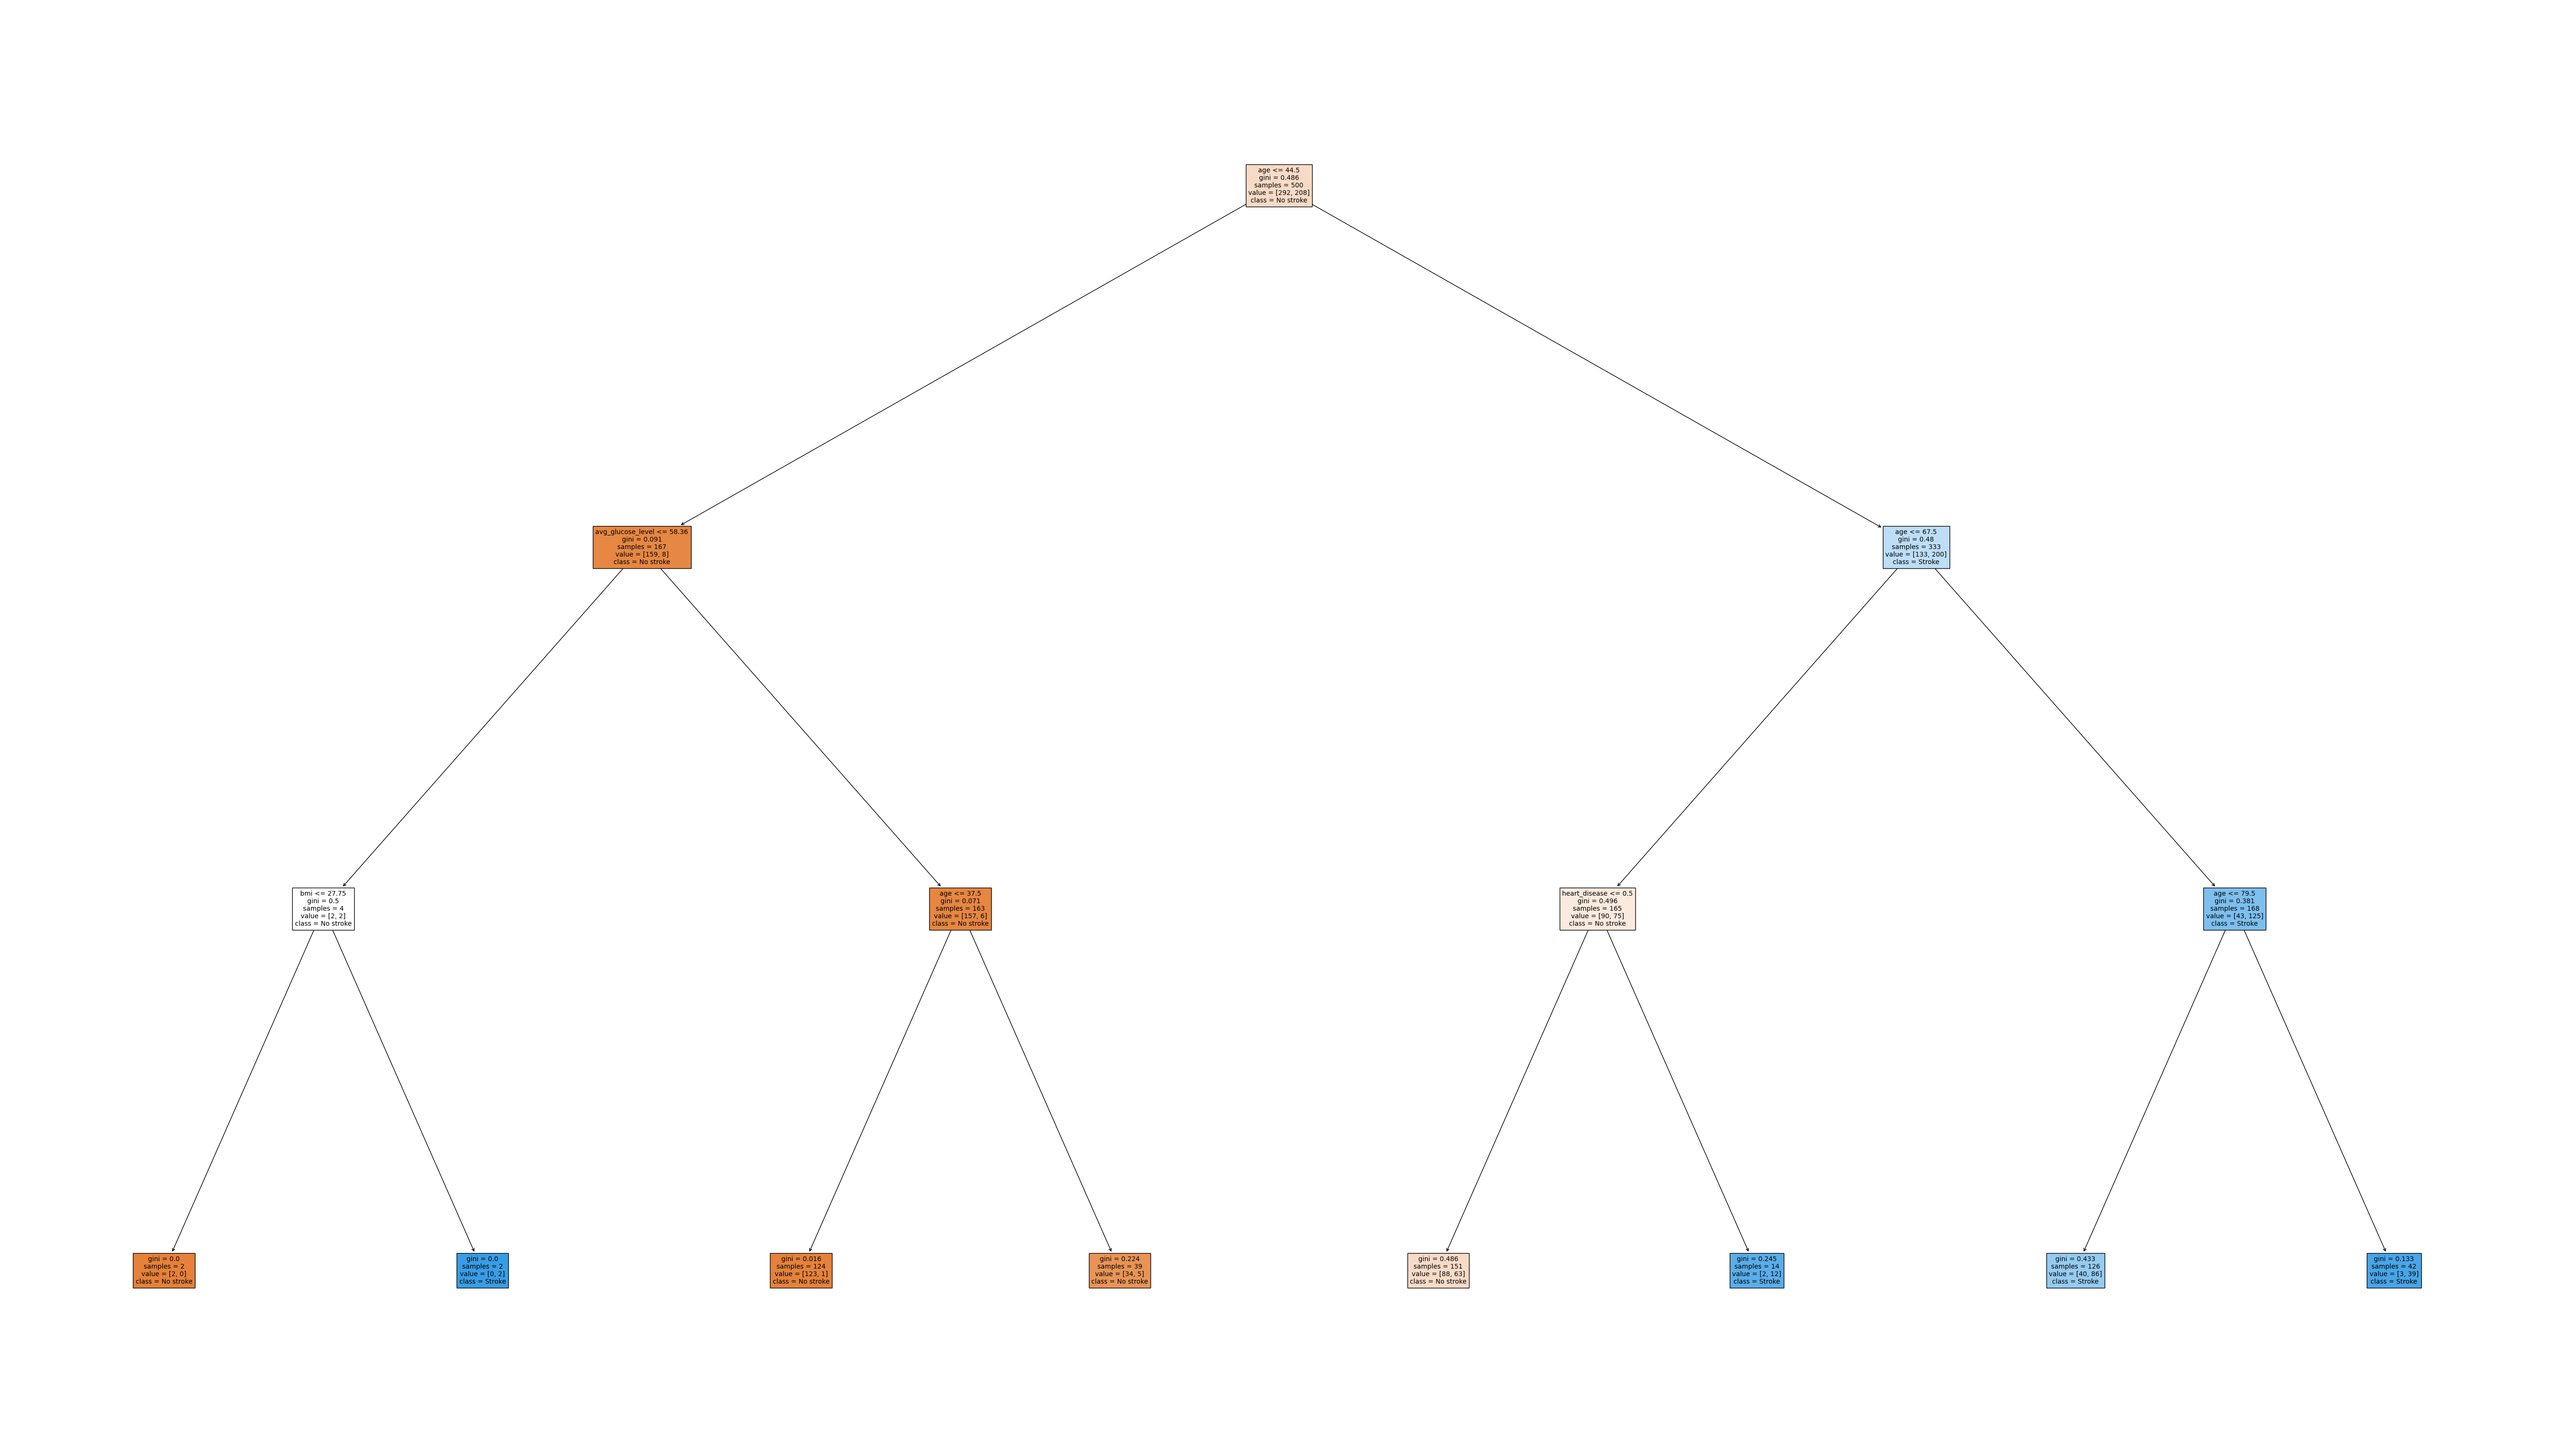

In [17]:
# your code here
plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(dtree_md3,
               class_names=["No stroke", "Stroke"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('pruned_tree.png', bbox_inches='tight') # save plot as png file 

# <font color='red'>TASK 6</font>


Each path in a decision tree can be understood as a rule, of the form, *"if A and B and C ... then y"*. Take a look at the tree you just plotted above and write down that rule (or path) that leads to the `stroke` label on the left-most branch of the tree.

# <font color='red'>TASK 7</font>


Until now we have used all the data to train the model. But to build predictive, generalizable machine learning models, we typically want to split the data and into separate training and test sets. This way, you can get a sense of how well your model will perform on new, unseen data by evaluating its performance on the test set (we'll talk more about this later in the course).

Split the data in a training and test set with the `train_test_split` function from `sklearn`. Use a 70% of the data for the training set, and 30% of the data for the test set, and set the `random_state` parameter to 42.

This should leave you with four arrays: `X_train`, `X_test`, `y_train`, and `y_test`.

In [ ]:
# your code here

Check that the sizes of the training and test sets are as intended:

In [ ]:
X_train.shape
X_test.shape

# <font color='red'>TASK 8</font>

Train a DecisionTreeClassifier with the training data (`X_train` and `y_train`) defined above. Set `max_depth = 5`.

In [ ]:
# your code here

# <font color='red'>TASK 9</font>


Now it's time to use the trained classification tree to make predictions for based on the test data (`X_test`). Use `dtree.predict()` to make the predictions and save them as `y_pred`.

In [ ]:
# your code here

# <font color='red'>TASK 10</font>

In order to test how well our model is classifying casses, we need to compute the accuracy obtained. This means calculating the percentage of instances where `y_pred` (our predicted class labels for the test data) matches `y_test` (the actual class labels for the test data)

Calculate the accuracy score below.

(Hint: You can either do it by manually by calculating the fraction of instances where `y_test==y_pred` over the total number of instances, or you can use the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function from `sklearn`. The latter is generally recommended.)

In [ ]:
# your code here

# <font color='red'>BONUS TASK</font>


Try changing the `max_depth` and the `min_samples_leaf` parameters to see if you can increase your model's accuracy.